In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Maximization Task

In [2]:
def f(x):
    y = (np.cos(30*x) + np.sin(15*x)/3 - np.cos(5*x)) 
    return y

f_v = np.vectorize(f)

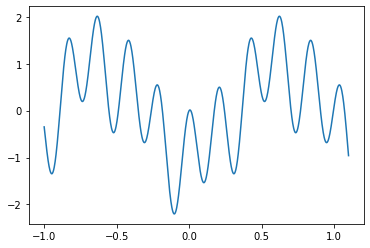

In [3]:
X = np.linspace(-1, 1.1, num = 1000)
plt.plot(X, f_v(X))

In [4]:
def simulated_annealing(area, func, T):
    scale = np.sqrt(T)
    strt_point = np.random.choice(area)
    x = strt_point
    current = func(x)
    vect = [x]
    
    for i in range(1000):
        prop = x + np.random.normal() * scale
        
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - current):
            prop = x
            
        x = prop
        current = func(x)
        T *= 0.9 #reducing temperature by 10%
        vect.append(x)
        
    return x, vect

In [99]:
x1, vect = simulated_annealing(X, f, T = 4)

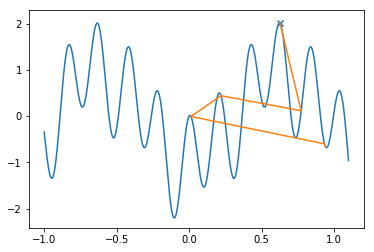

In [100]:
plt.plot(X, f_v(X))
plt.scatter(x1, f_v(x1), marker = 'x')
plt.plot(vect, f_v(vect))

In [104]:
f(vect[-1])

2.010494093880733

## Minimization task

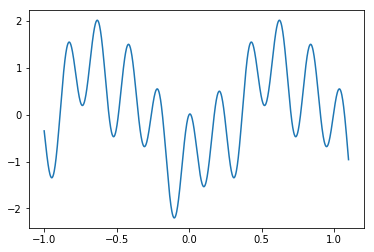

In [82]:
def h(x):
    y = (np.cos(30*x) + np.sin(15*x)/3 - np.cos(5*x))  
    return y

h_v = np.vectorize(h)

X = np.linspace(-1, 1.1, num = 1000)
plt.plot(X, h_v(X))

In [8]:
from scipy import optimize

In [105]:
x0 = [0.0]
minimizer_kwargs = { "method": "L-BFGS-B" } #Broyden–Fletcher–Goldfarb–Shanno algorithm with restrictions
x1 = optimize.basinhopping(h, x0, minimizer_kwargs=minimizer_kwargs, niter = 200)

print x1.fun


[-2.20249544]
